In [293]:
import pandas as pd
import numpy as np
# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# To build linear regression_model
import statsmodels.api as sm
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [294]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv")
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [295]:
df=data.copy()

In [296]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [147]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [148]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [150]:
# Let's look at the statistical summary of the data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
#Observations

Advertising on TV shows  the highest amount spent  compared to Radio and newspaper.


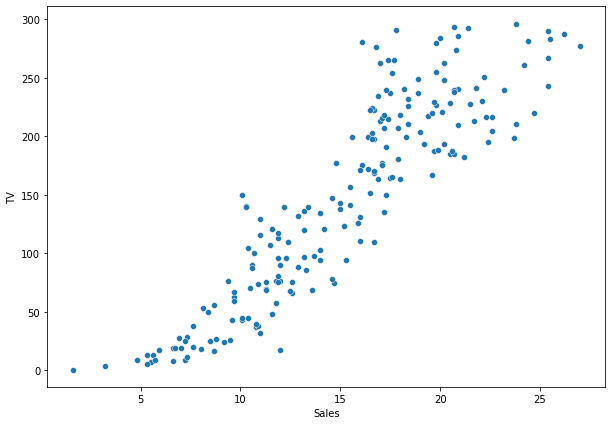

In [151]:
#relationship between the amount spent on advertising on TV and units sold:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="TV", x="Sales",data=df)
plt.show()

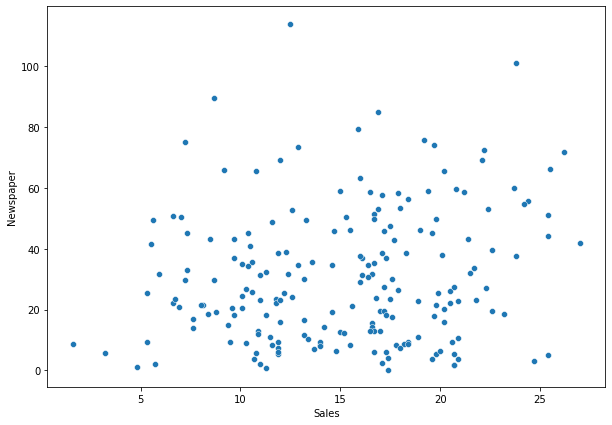

In [152]:
##relationship between the amount spent on advertising on Newspaper and units sold
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Newspaper", x="Sales",data=df)
plt.show()

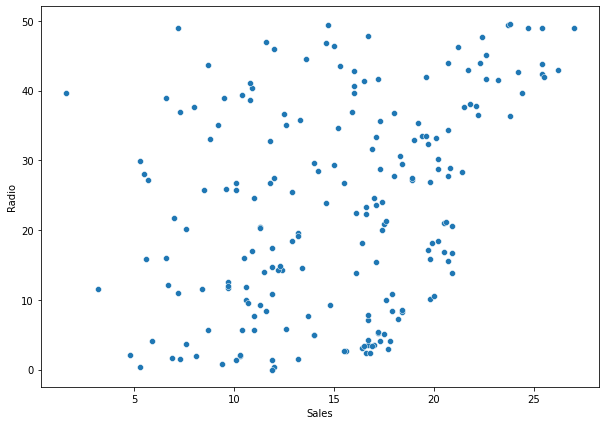

In [153]:
##relationship between the amount spent on advertising on Radio and units sold
plt.figure(figsize=(10, 7))
sns.scatterplot(y="Radio", x="Sales",data=df)
plt.show()

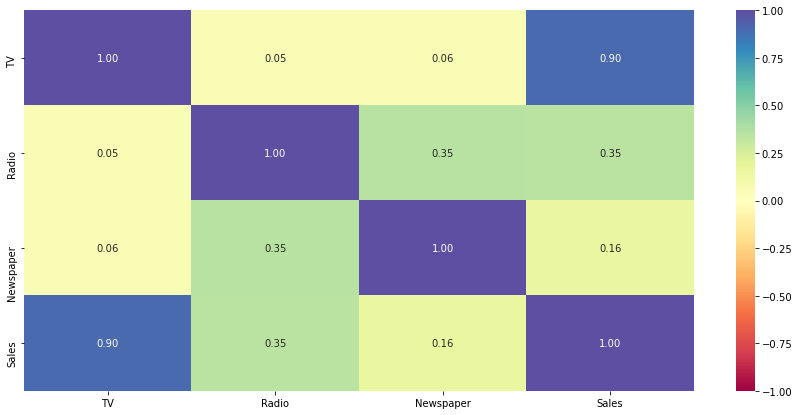

In [158]:
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

In [ ]:
#Linear Model Building
We want to predict the Sales.
W will  split the data into train and test to be able to evaluate the model that we build on the train data.

We will build a Linear Regression model using the train data and then check it's performance.

In [324]:
# independent variables
X = df.drop(["Sales"], axis=1)
# dependent variable
Y = df[["Sales"]]

In [325]:
# Splitting the dependent and independent features of the dataset into training and testing dataset  
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 10 )  
  

In [369]:
# invoke the LinearRegression function and find the bestfit model on training data
model = LinearRegression()
model =model.fit(X_train, Y_train)

LinearRegression()

LinearRegression()

In [370]:
r_squared=model.score(X_test, Y_test)
r_squared

0.9032402609859365

In [330]:
# The value of the coefficients for the independent feature through the multiple regression model  
print("Value of the oefficients: \n", model.coef_)  
  

Value of the oefficients: 
 [[0.05239302 0.10752238 0.0004338 ]]


In [331]:
# The value of the mean squared error  
print(f"Mean square error: {mean_squared_error( Y_test, Y_pred)}")  

Mean square error: 3.5798147480279896


In [332]:
# The value of the coefficient of determination, i.e., R-square score of the model  
print(f"Coefficient of determination: {r2_score( Y_test, Y_pred )}")  

Coefficient of determination: 0.9052341425867524


In [371]:
# Predict  in the test data
predictions = model.predict(X_test)
print(predictions)

[[19.12747936]
 [10.65852485]
 [19.35649586]
 [24.31564312]
 [20.75103667]
 [15.20788807]
 [16.74043094]
 [20.67093069]
 [21.00316399]
 [10.7788257 ]
 [24.66099024]
 [ 9.00963253]
 [10.53527793]
 [20.05117037]
 [20.44168429]
 [13.47939545]
 [21.18824056]
 [ 8.41424551]
 [21.67163287]
 [20.51065638]
 [17.02457809]
 [ 9.21066173]
 [23.21755583]
 [15.10505793]
 [20.68810884]
 [ 8.2524142 ]
 [10.45099468]
 [11.48900941]
 [21.9516149 ]
 [ 8.10780392]
 [13.80590784]
 [20.92540927]
 [ 6.53414983]
 [ 6.58636564]
 [20.58750523]
 [19.66705648]
 [ 9.11823728]
 [20.9501744 ]
 [10.69193814]
 [16.93579205]
 [11.40353629]
 [13.32243762]
 [15.55515994]
 [ 9.95894857]
 [21.30623834]
 [ 9.87307003]
 [16.61412404]
 [18.00121195]
 [ 8.33413354]
 [13.75410952]
 [ 9.53913181]
 [16.66708172]
 [24.38844901]
 [17.43861814]
 [17.90898685]
 [ 7.93968086]
 [24.69592961]
 [18.65074869]
 [12.47960247]
 [ 9.69139484]]


In [377]:
y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")

predicted response:
[[22.14962871 40.28718838  5.05504642]]


# Insights
A machine learning model  is trained to predict the future sales of a product.
Predicting the future sales of a product helps  the manufacturing and advertising cost of the product.